# College Football Machine Learning v1 (2005-2012)

In [70]:
#Imports
import pandas as pd
import numpy as np

# Data Load/Analysis

In [71]:
data_05 = pd.read_csv('CFB/data/2005/team-game-statistics.csv')

In [72]:
data_06 = pd.read_csv('CFB/data/2006/team-game-statistics.csv')

In [73]:
data_07 = pd.read_csv('CFB/data/2007/team-game-statistics.csv')

In [74]:
data_08 = pd.read_csv('CFB/data/2008/team-game-statistics.csv')

In [75]:
data_09 = pd.read_csv('CFB/data/2009/team-game-statistics.csv')

In [76]:
data_10 = pd.read_csv('CFB/data/2010/team-game-statistics.csv')

In [77]:
data_11 = pd.read_csv('CFB/data/2011/team-game-statistics.csv')

In [78]:
data_12 = pd.read_csv('CFB/data/2012/team-game-statistics.csv')

In [79]:
game_stat = pd.concat([data_05,data_06,data_07,data_08,data_09,data_10,data_11,data_12],
                      ignore_index=True)
game_stat.shape

(12744, 68)

In [80]:
game_stat.head()

,Team Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,...,Time Of Possession,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal
0,5,5055920050910,21,23,0,46,26,362,3,0,...,1433,5,42,13,2,3,0,2,1,1
1,5,5041920050917,39,102,0,43,23,319,2,3,...,2154,8,49,14,7,2,0,5,2,0
2,5,503000520050924,32,119,1,39,20,406,5,0,...,1764,5,36,15,6,0,0,4,3,1
3,5,129000520051001,24,90,0,57,30,270,2,3,...,1908,5,50,20,7,1,1,2,0,1
4,5,5008620051008,36,79,1,33,12,145,0,0,...,1657,9,89,18,3,3,1,5,1,2


In [81]:
game_stat.describe()

,Team Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,...,Time Of Possession,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal
count,12744.000000,1.274400e+04,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,...,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000
mean,434.334903,4.393443e+14,37.230383,154.518989,1.571014,31.407015,18.528876,220.922003,1.541196,0.983443,...,1800.179614,6.118409,52.454253,14.211158,5.596830,1.471438,0.736425,3.684557,2.195543,0.799278
std,251.001174,2.630027e+14,9.913340,88.581660,1.459483,10.606832,7.379030,94.376015,1.322227,1.038742,...,260.044982,2.826850,26.629200,2.858520,2.476706,1.279002,0.907460,1.869180,1.594070,0.877427
min,5.000000,5.004720e+12,7.000000,-65.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,...,866.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,234.000000,2.310716e+14,30.000000,90.000000,0.000000,24.000000,13.750000,153.000000,1.000000,0.000000,...,1623.000000,4.000000,34.000000,12.000000,4.000000,1.000000,0.000000,2.000000,1.000000,0.000000
50%,457.000000,4.630417e+14,37.000000,143.000000,1.000000,31.000000,18.000000,215.000000,1.000000,1.000000,...,1800.000000,6.000000,50.000000,14.000000,5.000000,1.000000,1.000000,4.000000,2.000000,1.000000
75%,664.000000,6.700288e+14,44.000000,208.000000,2.000000,38.000000,23.000000,278.000000,2.000000,2.000000,...,1976.000000,8.000000,69.000000,16.000000,7.000000,2.000000,1.000000,5.000000,3.000000,1.000000
max,2915.000000,2.915080e+15,86.000000,604.000000,9.000000,80.000000,58.000000,669.000000,9.000000,7.000000,...,3209.000000,20.000000,187.000000,27.000000,16.000000,9.000000,7.000000,11.000000,10.000000,6.000000


# Data Prep

In [82]:
#game_stat = game_stat.sort_values(by=['Team Code'])

# Sorting by team decreased the performance

In [83]:
game_stat['Final score'] = (3*game_stat['Field Goal Made'])+(2*game_stat['Def 2XP Made'])


In [84]:
game_stat['Final score'] = game_stat['Final score'] + (6*game_stat['Kickoff Ret TD'])+(2*game_stat['Off 2XP Made'])

In [85]:
game_stat['Final score']= game_stat['Final score'] + (6*game_stat['Fum Ret TD'])+(6*game_stat['Pass TD'])

In [86]:
game_stat['Final score']= game_stat['Final score']+(6*game_stat['Punt Ret TD'])+(6*game_stat['Int Ret TD'])+(6*game_stat['Rush TD'])

In [87]:
game_stat['Final score']=game_stat['Final score']+game_stat['Off XP Kick Made']

In [88]:
game_stat.head()

,Team Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,...,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal,Final score
0,5,5055920050910,21,23,0,46,26,362,3,0,...,5,42,13,2,3,0,2,1,1,24
1,5,5041920050917,39,102,0,43,23,319,2,3,...,8,49,14,7,2,0,5,2,0,17
2,5,503000520050924,32,119,1,39,20,406,5,0,...,5,36,15,6,0,0,4,3,1,48
3,5,129000520051001,24,90,0,57,30,270,2,3,...,5,50,20,7,1,1,2,0,1,17
4,5,5008620051008,36,79,1,33,12,145,0,0,...,9,89,18,3,3,1,5,1,2,13


In [89]:
game_stat.loc[game_stat['Team Code'] == game_stat['Team Code'].shift(periods=-1), 'Predict Score'] = game_stat['Final score'].shift(periods=-1)
game_stat.loc[game_stat['Team Code'] != game_stat['Team Code'].shift(periods=-1), 'Predict Score'] = np.NaN

In [90]:
# Fill missing values with average

game_stat['Predict Score']= game_stat['Predict Score'].fillna(game_stat['Predict Score'].mean())

game_stat.head(n=14)

,Team Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,...,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal,Final score,Predict Score
0,5,5055920050910,21,23,0,46,26,362,3,0,...,42,13,2,3,0,2,1,1,24,17.000000
1,5,5041920050917,39,102,0,43,23,319,2,3,...,49,14,7,2,0,5,2,0,17,48.000000
2,5,503000520050924,32,119,1,39,20,406,5,0,...,36,15,6,0,0,4,3,1,48,17.000000
3,5,129000520051001,24,90,0,57,30,270,2,3,...,50,20,7,1,1,2,0,1,17,13.000000
4,5,5008620051008,36,79,1,33,12,145,0,0,...,89,18,3,3,1,5,1,2,13,23.000000
5,5,5041420051015,33,160,2,44,22,217,1,2,...,108,17,5,2,1,5,3,1,23,0.000000
6,5,725000520051022,22,44,0,45,21,188,0,1,...,10,17,5,3,1,0,0,0,0,24.000000
7,5,5007120051029,42,153,2,29,15,205,1,0,...,84,16,7,1,1,4,3,1,24,17.000000
8,5,5004720051105,28,84,0,44,22,285,2,1,...,80,17,6,2,1,3,1,1,17,27.000000
9,5,519000520051115,44,228,2,32,22,270,1,1,...,85,17,6,2,2,6,2,2,27,35.000000


In [91]:
#Rounding to whole number

game_stat['Predict Score'] = np.round(game_stat['Predict Score'],decimals=0)

In [92]:
game_stat.columns

Index(['Team Code', 'Game Code', 'Rush Att', 'Rush Yard', 'Rush TD',
       'Pass Att', 'Pass Comp', 'Pass Yard', 'Pass TD', 'Pass Int',
       'Pass Conv', 'Kickoff Ret', 'Kickoff Ret Yard', 'Kickoff Ret TD',
       'Punt Ret', 'Punt Ret Yard', 'Punt Ret TD', 'Fum Ret', 'Fum Ret Yard',
       'Fum Ret TD', 'Int Ret', 'Int Ret Yard', 'Int Ret TD', 'Misc Ret',
       'Misc Ret Yard', 'Misc Ret TD', 'Field Goal Att', 'Field Goal Made',
       'Off XP Kick Att', 'Off XP Kick Made', 'Off 2XP Att', 'Off 2XP Made',
       'Def 2XP Att', 'Def 2XP Made', 'Safety', 'Points', 'Punt', 'Punt Yard',
       'Kickoff', 'Kickoff Yard', 'Kickoff Touchback', 'Kickoff Out-Of-Bounds',
       'Kickoff Onside', 'Fumble', 'Fumble Lost', 'Tackle Solo',
       'Tackle Assist', 'Tackle For Loss', 'Tackle For Loss Yard', 'Sack',
       'Sack Yard', 'QB Hurry', 'Fumble Forced', 'Pass Broken Up',
       'Kick/Punt Blocked', '1st Down Rush', '1st Down Pass',
       '1st Down Penalty', 'Time Of Possession', 'Penalty

# Train Test Split

In [93]:
x_data = game_stat.drop(['Predict Score','Team Code','Game Code','Points'],axis=1)
y_true = game_stat['Predict Score']

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

# Scaling

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = MinMaxScaler()

In [98]:
scaler.fit(x_train)


/Users/jonathanhampton/.conda/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [99]:
x_train = pd.DataFrame(data=scaler.transform(x_train),columns = x_train.columns,index=x_train.index)

In [100]:
x_test = pd.DataFrame(data=scaler.transform(x_test),columns = x_test.columns,index=x_test.index)

In [101]:
x_train.head()

,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,Pass Conv,Kickoff Ret,...,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal,Final score
1137,0.552632,0.721557,0.666667,0.220779,0.232143,0.261905,0.333333,0.142857,0.0,0.076923,...,0.35,0.294118,0.260870,0.3750,0.111111,0.142857,0.636364,0.7,0.0,0.714286
6187,0.289474,0.223054,0.111111,0.415584,0.339286,0.269345,0.000000,0.000000,0.0,0.461538,...,0.50,0.561497,0.478261,0.2500,0.333333,0.142857,0.272727,0.1,0.0,0.083333
8945,0.328947,0.275449,0.111111,0.467532,0.321429,0.205357,0.000000,0.142857,0.0,0.538462,...,0.25,0.245989,0.521739,0.2500,0.666667,0.285714,0.090909,0.1,0.0,0.083333
2169,0.236842,0.203593,0.000000,0.376623,0.232143,0.138393,0.111111,0.428571,0.0,0.384615,...,0.15,0.171123,0.434783,0.1875,0.111111,0.142857,0.000000,0.0,0.0,0.083333
3457,0.250000,0.239521,0.333333,0.506494,0.517857,0.593750,0.333333,0.000000,0.0,0.230769,...,0.60,0.518717,0.260870,0.3125,0.333333,0.142857,0.454545,0.5,0.0,0.583333


# Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lin_reg = LinearRegression()

In [104]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
y_preds_LR = lin_reg.predict(x_test)

In [106]:
from sklearn.metrics import mean_squared_error

# Linear Regression Performance

In [107]:
LR_error = mean_squared_error(y_test,y_preds_LR)**0.5
LR_error

12.992119365927708

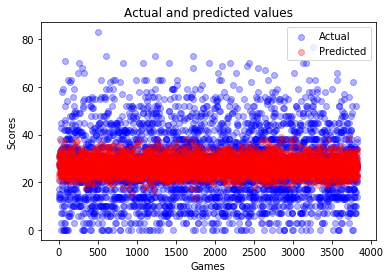

In [108]:
import matplotlib.pyplot as plt
% matplotlib inline
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_preds_LR.size), y=y_preds_LR, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Games')
plt.ylabel('Scores')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

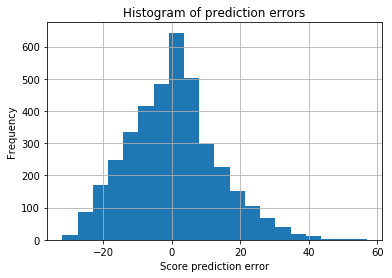

In [109]:
diff = y_test - y_preds_LR
diff.hist(bins = 20)
plt.title('Histogram of prediction errors')
plt.xlabel('Score prediction error')
plt.ylabel('Frequency')

# Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
log_reg = LogisticRegression(random_state=101)

In [112]:
log_reg.fit(x_train,y_train)

/Users/jonathanhampton/.conda/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jonathanhampton/.conda/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=101, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Logistic Regression Performance

In [113]:
y_preds_log_reg = log_reg.predict(x_test)

In [114]:
mean_squared_error(y_test,y_preds_log_reg)**0.5

13.566231072888762

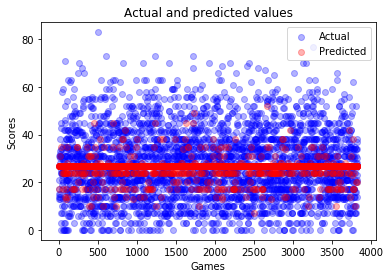

In [115]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_preds_log_reg.size), y=y_preds_log_reg, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Games')
plt.ylabel('Scores')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

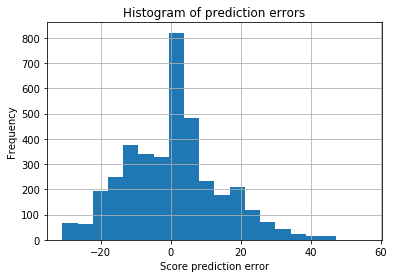

In [116]:
diff = y_test - y_preds_log_reg
diff.hist(bins = 20)
plt.title('Histogram of prediction errors')
plt.xlabel('Score prediction error')
plt.ylabel('Frequency')

# Logistic Regression w/ Different Solver

<b> >> The 'liblinear' is known to have better results on smaller data sets. Lets see how it performs... </b>

In [117]:
lr_2 = LogisticRegression(random_state=101, solver='liblinear')

In [118]:
lr_2.fit(x_train,y_train)

/Users/jonathanhampton/.conda/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=101, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
y_preds_lr_2 = lr_2.predict(x_test)

# Performance

In [120]:
logreg_error = mean_squared_error(y_test,y_preds_lr_2)**0.5
logreg_error

13.566231072888762

<b> No performance improvements... </b>

# K Nearest Neighbors

In [121]:
from sklearn.neighbors import KNeighborsRegressor

In [122]:
k_neigh = KNeighborsRegressor()

In [123]:
k_neigh.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [124]:
y_preds_knn = k_neigh.predict(x_test)

# Performance

In [125]:
mean_squared_error(y_test,y_preds_knn)**0.5

14.187614670614684

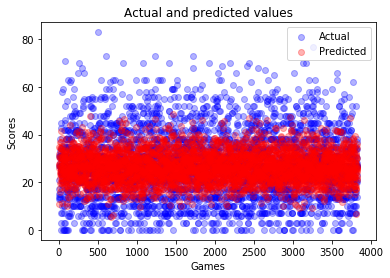

In [126]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_preds_knn.size), y=y_preds_knn, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Games')
plt.ylabel('Scores')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

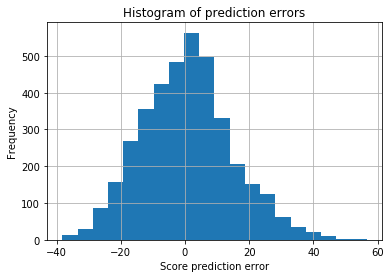

In [127]:
diff = y_test - y_preds_knn
diff.hist(bins = 20)
plt.title('Histogram of prediction errors')
plt.xlabel('Score prediction error')
plt.ylabel('Frequency')

# kNN w/ different number of neighbors

In [128]:
k_neigh_2 = KNeighborsRegressor(n_neighbors=2)

In [129]:
k_neigh_2.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [130]:
y_preds_knn_2 = k_neigh_2.predict(x_test)

In [131]:
mean_squared_error(y_test,y_preds_knn_2)**0.5

15.835250700540044

<b> The performance is worse with less neighbors. Lets try with more neighbors. <b/>

In [132]:
k_neigh_3 = KNeighborsRegressor(n_neighbors=150)

In [133]:
k_neigh_3.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=150, p=2,
          weights='uniform')

In [134]:
y_preds_knn_3 = k_neigh_3.predict(x_test)

In [135]:
knn_error = mean_squared_error(y_test,y_preds_knn_3)**0.5

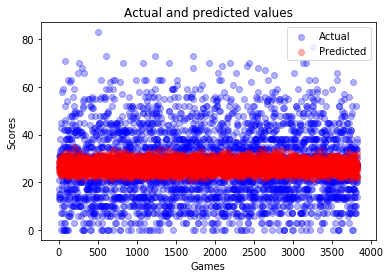

In [136]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_preds_knn_3.size), y=y_preds_knn_3, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Games')
plt.ylabel('Scores')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

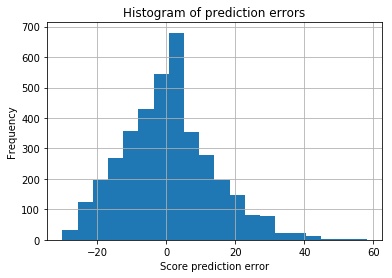

In [137]:
diff = y_test - y_preds_knn_3
diff.hist(bins = 20)
plt.title('Histogram of prediction errors')
plt.xlabel('Score prediction error')
plt.ylabel('Frequency')

# Summary of Performances

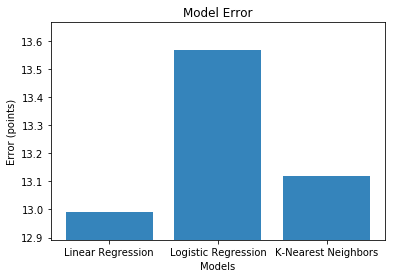

In [155]:
objects = ('Linear Regression', 'Logistic Regression', 'K-Nearest Neighbors')
y_pos = np.arange(len(objects))
performance = [LR_error,logreg_error,knn_error]

plt.bar(y_pos, performance, align='center', alpha=0.9,)
plt.xticks(y_pos, objects)
plt.xlabel('Models')
plt.ylabel('Error (points)')
plt.title('Model Error')
plt.ylim(LR_error-.1,logreg_error+.1)
plt.show()